annealing


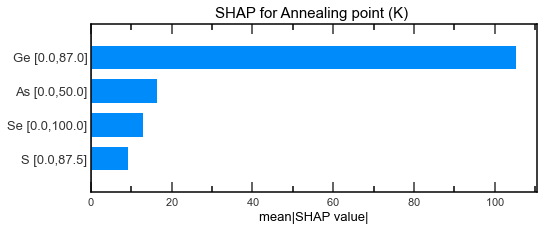

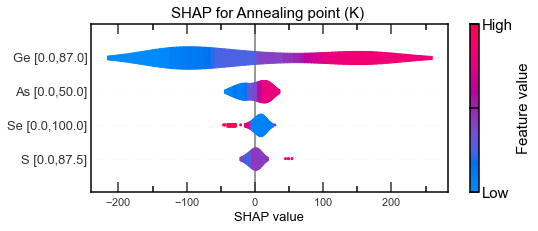

BulkModulus


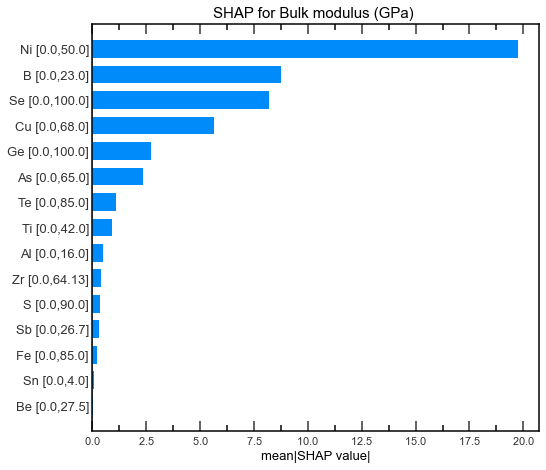

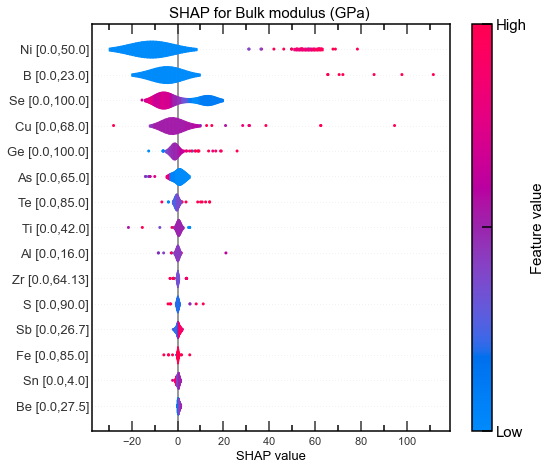

Density


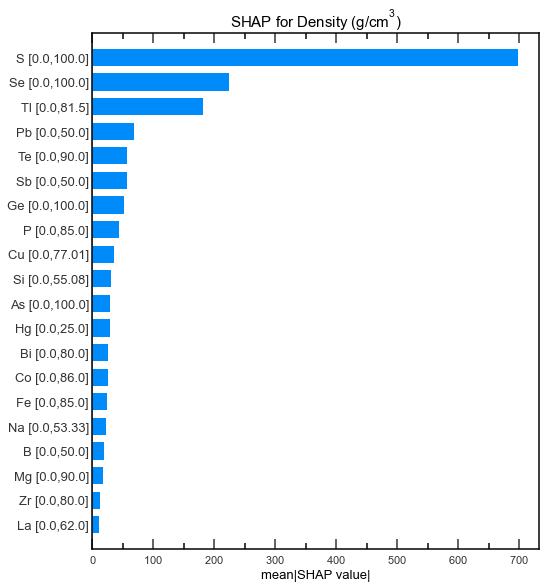

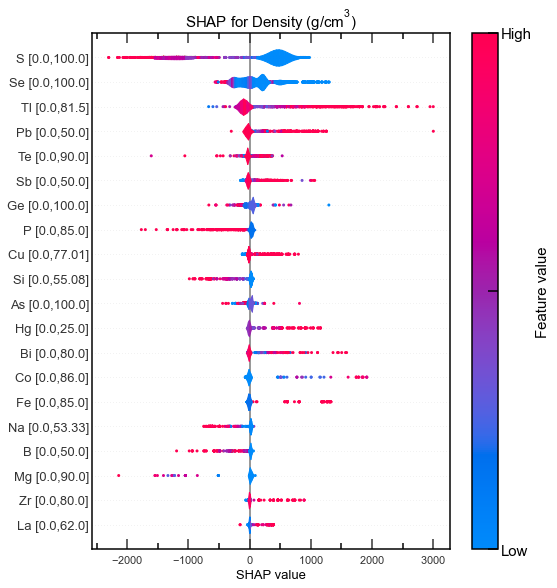

Littleton


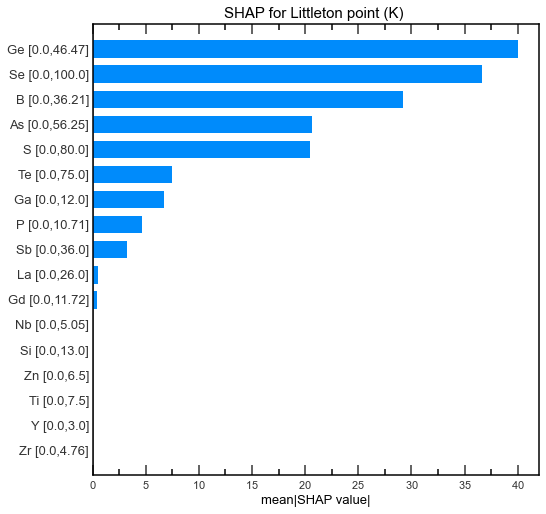

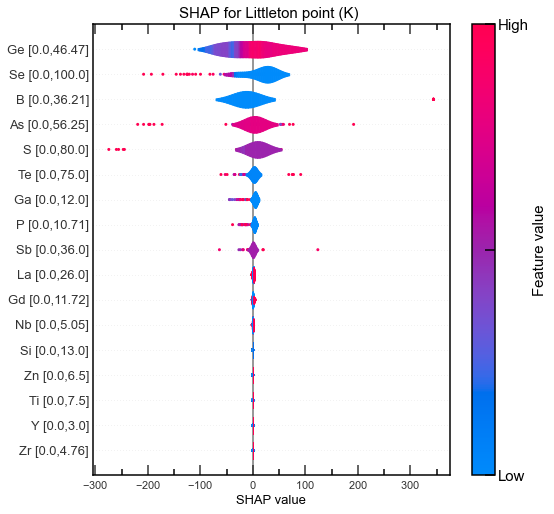

ND


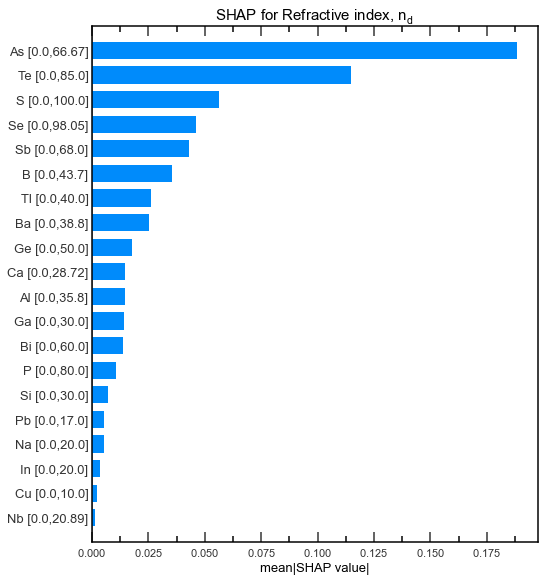

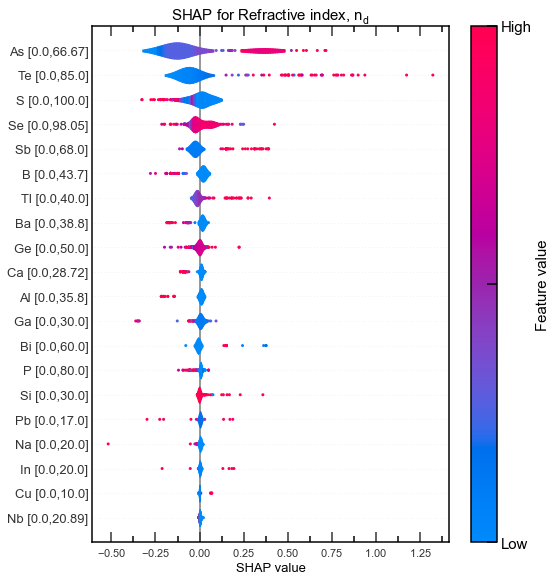

shear_modulus


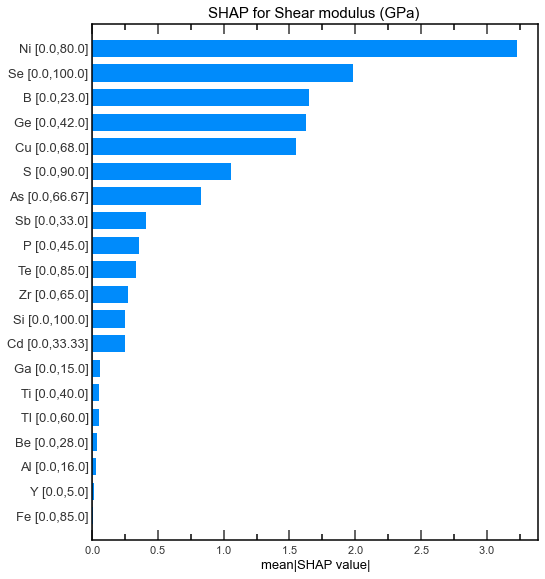

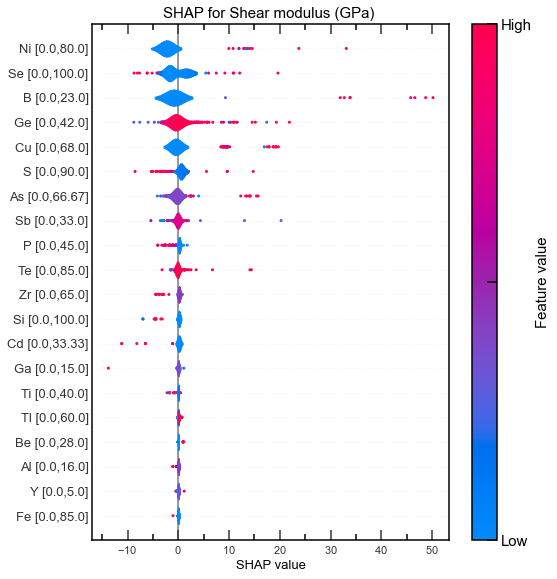

softening


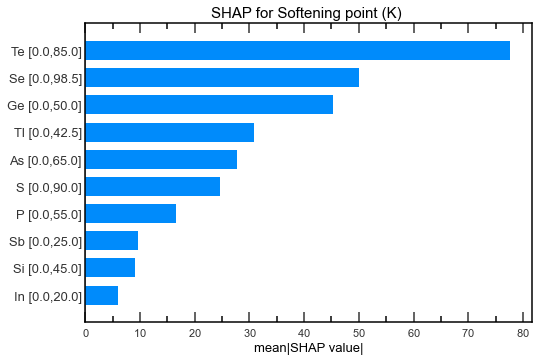

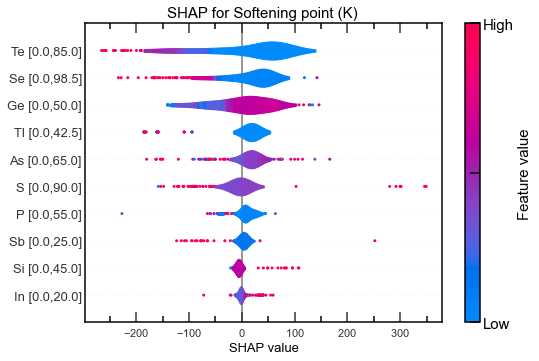

TEC


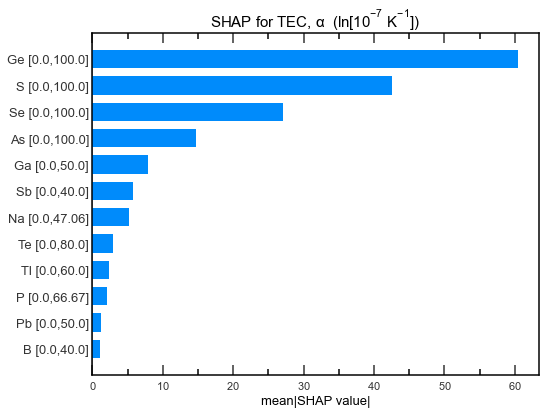

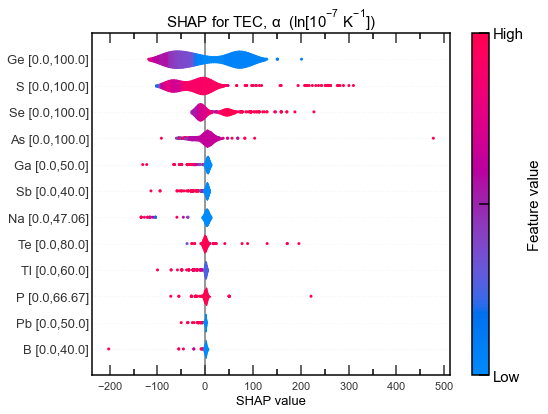

TG


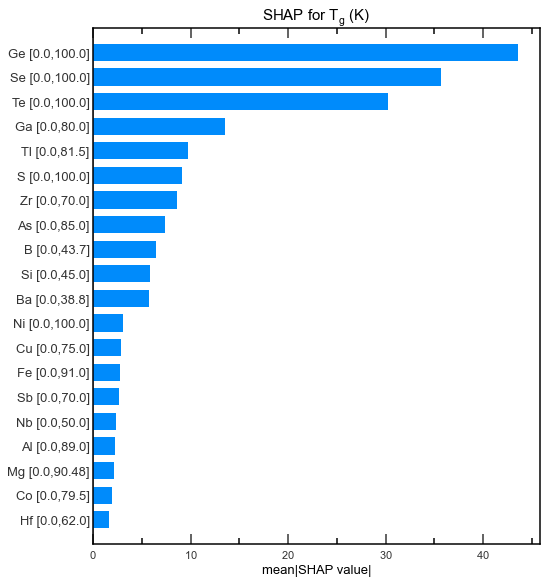

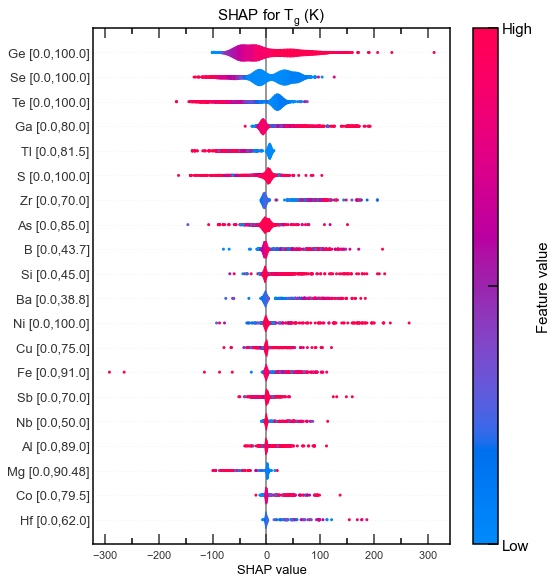

TLiq


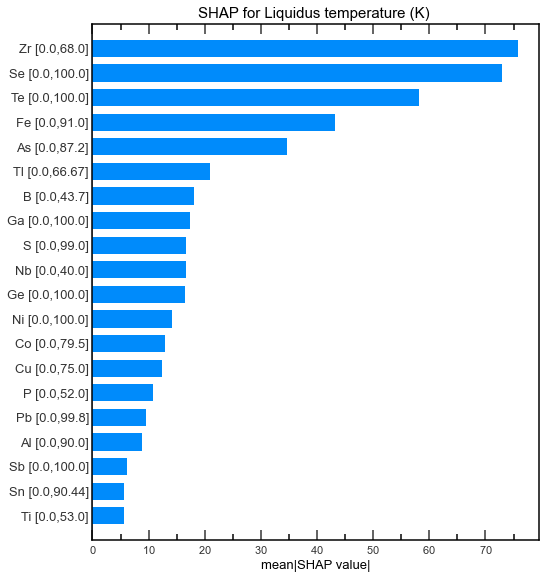

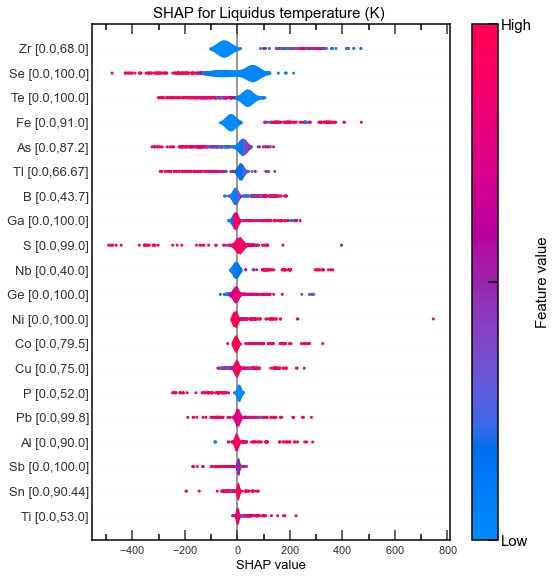

YM


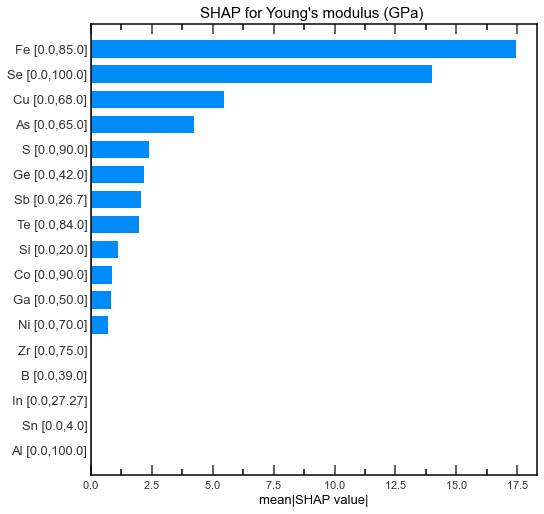

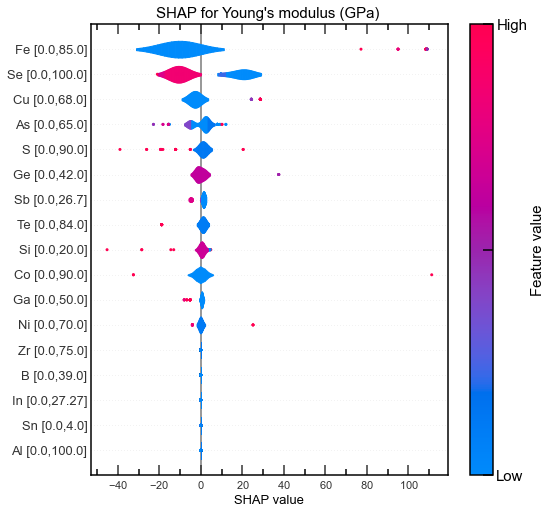

Hardness_RT


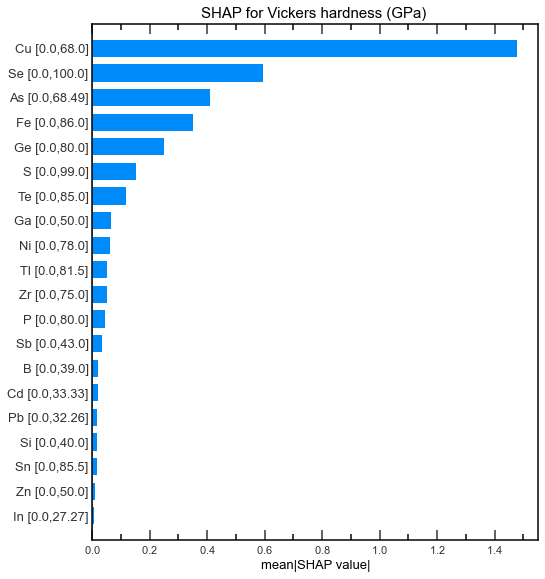

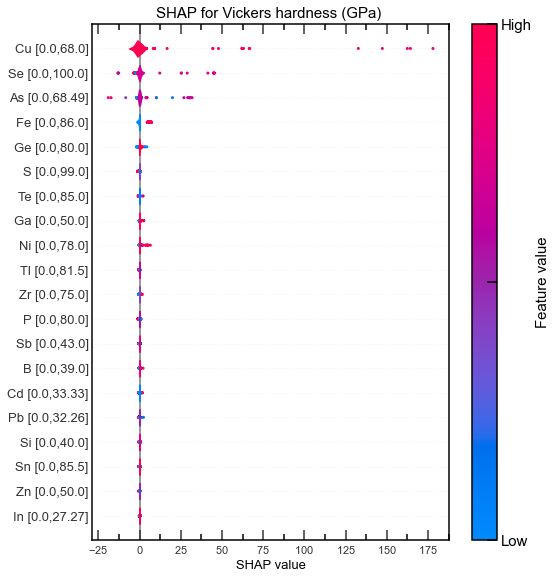

In [5]:
import pandas as pd
import csv
import matplotlib.pyplot as plt
import numpy as np 
from ipykernel import kernelapp as app
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV, KFold,cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
import optuna
import sklearn
from sklearn import datasets
from sklearn.svm import SVR
import optuna 
import shap
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
import os
import pickle
from new_plot import *
set_things()

set_font(size=15, family='Arial', weight='normal')
b = ['annealing', 'BulkModulus','Density','Littleton','ND' ,'shear_modulus','softening','TEC','TG','TLiq','YM','Hardness_RT']
# b = ['BulkModulus','ND' ,'Shear_modulus','YM','Hardness_RT'] 


for prop in b:
    
    path = r'Shap_values/'
    file = path + prop+'_shapvalue.pkl' 

#     print(file)

    propfile =  "new_data3/" + prop + ".csv"
 
    df = pd.read_csv(propfile)
    a=df 

    old_col = df.columns.tolist()
    new_col= {}
    for c in old_col:
        new_col[c] = c + str(" [" + str(np.round(a[c].min(),2))+','+str(np.round(a[c].max(),2)) + "]")
    df = df.rename(columns= new_col)

    data = df.values

    X_features = data[:,0:-1]
    Y_properties = data[:,-1]
#     mean2 = Y_properties.mean()
#     print("mean2 -> " + str(mean2))

#     Y_properties /= mean2
#     mean = Y_properties.mean()
#     std = Y_properties.std()
#     Zs = (Y_properties-mean)/std
#     mask = (Zs<3) & (Zs>-3)

#     X_features = X_features[mask.ravel(),:]
#     Y_properties = Y_properties[mask].ravel()

    sa = df.columns.values.tolist()
    sa = list(sa[:-1])
    a10 = sa

    # X = pd.DataFrame(data = X_features,columns = a10)
    # Y = pd.DataFrame(data = Y_properties, columns = [propcolumnname])

    X_tr,X_shap,Y_tr,Y_shap = train_test_split(X_features,Y_properties,test_size=0.8, random_state=42)
    X_train,X_test,Y_train,Y_test = train_test_split(X_features,Y_properties,test_size=0.2, random_state=33)


    shap_values = pickle.load(open(file, "rb"))
    i = prop
    if i == 'annealing':
        lab = "Annealing point (K) " 

    if i == 'BulkModulus':
        lab = "Bulk modulus (GPa) "
    if i == 'Density':
        lab = "Density (g/cm$^3$) "
    if i == 'Hardness_RT' or i == 'Hardness_misc':
        lab ="Vickers hardness (GPa) "
  
    if i== 'shear_modulus':
        lab = "Shear modulus (GPa) "
    if i== 'softening':
        lab = "Softening point (K) "
    if i== 'TLiq':
        lab = "Liquidus temperature (K) "
    if i == 'Littleton':
        lab = "Littleton point (K) "
    if i == 'TG':
        lab = "$T_g$ (K) "
    if i== 'TEC':
        lab ="TEC, \u03B1  (ln[$10^{-7}$ $K^{-1}$]) "
    if i== 'YM':
        lab = "Young's modulus (GPa) "
    if i== 'ND':
        lab =  "Refractive index, $n_d$ "

    from new_plot import *
    shap.initjs()
    fig,ax = plt.subplots(figsize=(6,6))
    
    # shap.summary_plot(shap_values, X_shap,feature_names=a10, plot_type='bar',show=False)
    shap.summary_plot(shap_values, show=False, plot_type='bar',feature_names=df.columns.tolist() , max_display=20)
    
    fig=plt.gca()
    fig.spines['top'].set_visible(True) 
    fig.spines['right'].set_visible(True)
    fig.spines['left'].set_visible(True)
    visible_ticks = {
   "top": True, }
    plt.tick_params(axis="x", which="both", **visible_ticks)
    plt.tick_params(axis="y", which="both", **visible_ticks)
    plt.title(f"SHAP for {lab}")
    plt.xlabel('mean|SHAP value|')#+propcolumnname)
#     plt.savefig('bar_plot_final_20/'+prop+'bar_plot_new20.png',dpi=1200,bbox_inches='tight')

    print(prop)

    fig,ax = plt.subplots(figsize=(6,6))

    shap.summary_plot(shap_values, X_shap ,feature_names= df.columns.tolist() ,  max_display=20, plot_type='violin',show=False, color_bar=False)
    
    fig=plt.gca()
    fig.spines['top'].set_visible(True) 
    fig.spines['right'].set_visible(True)
    fig.spines['left'].set_visible(True)
    visible_ticks = {
   "top": True, }
    plt.tick_params(axis="x", which="both", **visible_ticks)
    plt.tick_params(axis="y", which="both", **visible_ticks)
    plt.title(f"SHAP for {lab}")
    plt.xlabel('SHAP value')
    cbar = plt.colorbar()
    cbar.set_label('Feature value')
    cbar.minorticks_off()
    #cbar.ax.set_axis_off()
    midpoint_cbar = (cbar.vmax + cbar.vmin)/2
    cbar.set_ticks([cbar.vmax,midpoint_cbar,cbar.vmin])#,labels=['High','Low'])
    cbar.set_ticklabels(['High','','Low'])
#     plt.savefig('violin_plot_final_20/'+prop+'final_violin_plot_new20.png',dpi=1200,bbox_inches='tight')
    plt.show()

